<a href="https://colab.research.google.com/github/Apoorvdhavalikar27/Spam_Ham/blob/main/Spam_Ham_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

In [10]:
dataset = pd.read_csv("emails.csv")

In [11]:
dataset

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: the stock trading gunslinger fanny i...,1
3,Subject: unbelievable new homes made easy im ...,1
4,Subject: the stock trading gunslinger fanny i...,1
...,...,...
5725,Subject: re : research and development charges...,0
5726,"Subject: re : receipts from visit jim , than...",0
5727,Subject: re : enron case study update wow ! a...,0
5728,"Subject: re : interest david , please , call...",0


In [12]:
dataset.columns #Index(['text', 'spam'], dtype='object')

Index(['text', 'spam'], dtype='object')

In [13]:
dataset.tail(10)

,text,spam
5720,"Subject: altos na gas model kim , i know you ...",0
5721,Subject: power market research i came across ...,0
5722,Subject: re : visit to houston fyi - - - - -...,0
5723,Subject: ees risk management presentations for...,0
5724,Subject: re : vacation vince : i just found ...,0
5725,Subject: re : research and development charges...,0
5726,"Subject: re : receipts from visit jim , than...",0
5727,Subject: re : enron case study update wow ! a...,0
5728,"Subject: re : interest david , please , call...",0
5729,Subject: news : aurora 5 . 2 update aurora ve...,0


In [14]:
dataset.shape

(5730, 2)

In [15]:
# dataset.drop_duplicates(inplace = True)
dataset = dataset.drop_duplicates()

In [16]:
dataset.isnull().sum()

text    0
spam    0
dtype: int64

In [17]:
dataset = dataset.dropna()

In [18]:
# #Checking for duplicates and removing them
# dataset = dataset.drop_duplicates()
# #Checking for any null entries in the dataset
# print (pd.DataFrame(dataset.isnull().sum()))

In [19]:
# dataset.shape  #(5728, 2)
dataset

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
3,Subject: unbelievable new homes made easy im ...,1
5,Subject: 4 color printing special request add...,1
6,"Subject: do not have money , get software cds ...",1
...,...,...
5725,Subject: re : research and development charges...,0
5726,"Subject: re : receipts from visit jim , than...",0
5727,Subject: re : enron case study update wow ! a...,0
5728,"Subject: re : interest david , please , call...",0


In [20]:
#Using Natural Language Processing to cleaning the text to make one corpus
# Cleaning the texts
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [21]:
ps = PorterStemmer()
ps.stem('played')


'play'

In [22]:
dataset['text']

0       Subject: naturally irresistible your corporate...
1       Subject: the stock trading gunslinger  fanny i...
3       Subject: unbelievable new homes made easy  im ...
5       Subject: 4 color printing special  request add...
6       Subject: do not have money , get software cds ...
                              ...                        
5725    Subject: re : research and development charges...
5726    Subject: re : receipts from visit  jim ,  than...
5727    Subject: re : enron case study update  wow ! a...
5728    Subject: re : interest  david ,  please , call...
5729    Subject: news : aurora 5 . 2 update  aurora ve...
Name: text, Length: 5695, dtype: object

In [23]:
#dataset['text'][0]=dataset['text'][0][9:]
dataset['text']=dataset['text'].map(lambda text: text[9:])

In [24]:
dataset['text']

0       naturally irresistible your corporate identity...
1       the stock trading gunslinger  fanny is merrill...
3       unbelievable new homes made easy  im wanting t...
5       4 color printing special  request additional i...
6       do not have money , get software cds from here...
                              ...                        
5725    re : research and development charges to gpg  ...
5726    re : receipts from visit  jim ,  thanks again ...
5727    re : enron case study update  wow ! all on the...
5728    re : interest  david ,  please , call shirley ...
5729    news : aurora 5 . 2 update  aurora version 5 ....
Name: text, Length: 5695, dtype: object

In [25]:
#Every mail starts with 'Subject :' will remove this from each text 
dataset['text'] = dataset['text'].map(lambda text: text[9:])
dataset['text'] = dataset['text'].map(lambda text:re.sub('[^a-zA-Z0-9]+', ' ',text)).apply(lambda x: (x.lower()).split())

In [26]:
dataset['text']

0       [irresistible, your, corporate, identity, lt, ...
1       [trading, gunslinger, fanny, is, merrill, but,...
3       [ble, new, homes, made, easy, im, wanting, to,...
5       [rinting, special, request, additional, inform...
6       [ve, money, get, software, cds, from, here, so...
                              ...                        
5725    [arch, and, development, charges, to, gpg, her...
5726    [ipts, from, visit, jim, thanks, again, for, t...
5727    [n, case, study, update, wow, all, on, the, sa...
5728    [rest, david, please, call, shirley, crenshaw,...
5729    [rora, 5, 2, update, aurora, version, 5, 2, th...
Name: text, Length: 5695, dtype: object

In [27]:
ps = PorterStemmer()
corpus=dataset['text'].apply(lambda text_list:' '.join(list(map(lambda word:ps.stem(word),(list(filter(lambda text:text not in set(stopwords.words('english')),text_list)))))))

In [28]:
corpus

0       irresist corpor ident lt realli hard recollect...
1       trade gunsling fanni merril muzo colza attaind...
3       ble new home made easi im want show homeown pr...
5       rint special request addit inform click click ...
6       money get softwar cd softwar compat great grow...
                              ...                        
5725    arch develop charg gpg forward shirley crensha...
5726    ipt visit jim thank invit visit lsu shirley fe...
5727    n case studi updat wow day super thank much vi...
5728    rest david pleas call shirley crenshaw assist ...
5729    rora 5 2 updat aurora version 5 2 fastest mode...
Name: text, Length: 5695, dtype: object

In [29]:
len(corpus.values)

5695

In [30]:
# Creating the Bag of Words model
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
X = cv.fit_transform(corpus.values).toarray()
y = dataset.iloc[:, 1].values

In [31]:
y

array([1, 1, 1, ..., 0, 0, 0])

In [32]:
len(cv.get_feature_names())

29697

In [33]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

In [34]:
X.shape

(5695, 29697)

In [35]:
X_train.shape

(4556, 29697)

In [36]:
X_test.shape

(1139, 29697)

In [37]:
y_train.shape

(4556,)

In [38]:
y_test.shape

(1139,)

In [39]:
# Fitting Naive Bayes classifier to the Training set
from sklearn.naive_bayes import MultinomialNB
classifier = MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)
classifier.fit(X_train , y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [40]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)

In [41]:
y_test

array([1, 1, 0, ..., 0, 0, 0])

In [42]:
# Fitting Decision Tree classifier to the Training set
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier()
tree.fit(X_train , y_train)
tree_y_pred = tree.predict(X_test)

In [43]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

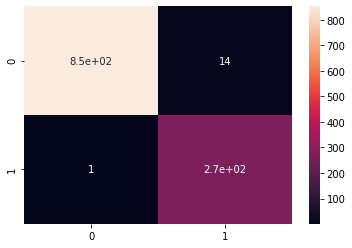

In [54]:
import seaborn as sn
sn.heatmap(cm,annot=True)

In [44]:
confusion_matrix(y_test, tree_y_pred)

array([[847,  20],
       [ 28, 244]])

In [45]:
(854+245)/1139

0.9648814749780509

In [46]:
(868+259)/1139

0.9894644424934153

In [47]:
y_test.shape

(1139,)

In [48]:
y_pred.shape

(1139,)

In [49]:
#saving the model
import pickle
f = open('classifier.pickle', 'wb')
pickle.dump(classifier, f)
f.close()

In [50]:
#loading the model
import pickle
f = open('classifier.pickle', 'rb')
cf = pickle.load(f)
f.close()

In [51]:
cf.predict(X_test)

array([1, 1, 0, ..., 0, 0, 0])

In [52]:
#saving the vectorization
import pickle
vec_file = 'vectorizer.pickle'
pickle.dump(cv, open(vec_file, 'wb'))
f.close()

In [53]:
#loading the vectorization
import pickle
e = open('vectorizer.pickle', 'rb')
vc = pickle.load(e)
e.close()